<a href="https://colab.research.google.com/github/manasik29/Logistic_Regression_Assignment/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")

Attribute information For bank dataset

   Input variables:
   
   # bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [1]:
import pandas as pd
df = pd.read_csv('/content/bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**EDA**

In [ ]:
#check for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


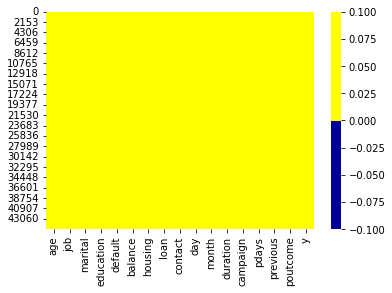

In [ ]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for non missing, blue for missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

We can coclude no missing values.

In [ ]:
#check for duplicate values
df[df.duplicated()].shape

(0, 17)

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


We can conclude no duplicate values in data.

In [2]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
#to correct dtypes of columns
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['y'] = df['y'].astype('category')

In [ ]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [ ]:
#Get descreptive Stats of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


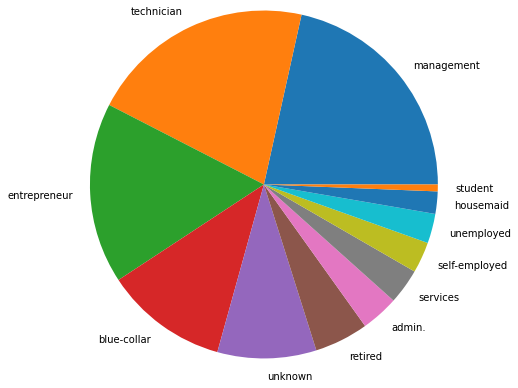

In [ ]:
#Univariate Analysis
#for categorical columns
values_job = df.job.value_counts()
labels_job = df.job.unique().tolist()
plt.pie(values_job, labels=labels_job, radius = 2)

print(values_job)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


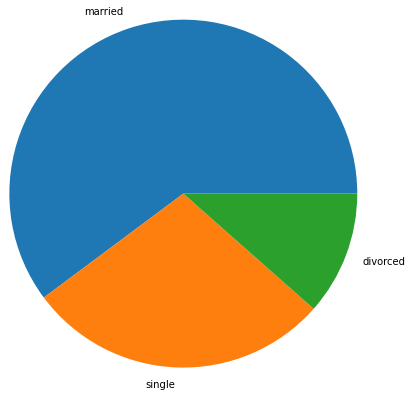

In [ ]:
values_marital = df.marital.value_counts()
labels_marital = df.marital.unique().tolist()
plt.pie(values_marital, labels=labels_marital, radius = 2)

print(values_marital)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


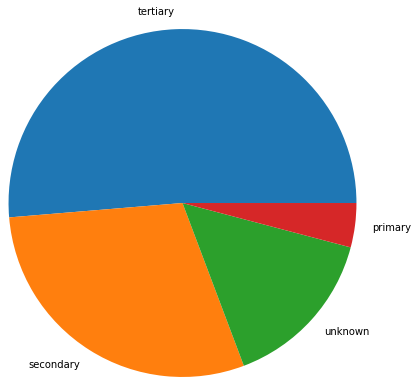

In [ ]:
values_education = df.education.value_counts()
labels_education = df.education.unique().tolist()
plt.pie(values_education, labels=labels_education, radius = 2)

print(values_education)

no     44396
yes      815
Name: default, dtype: int64


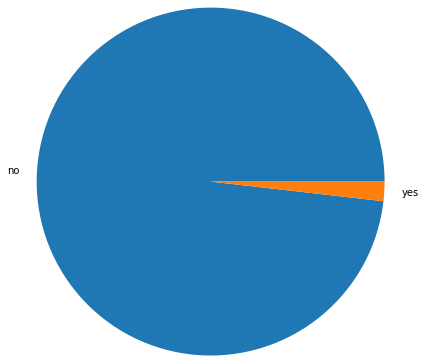

In [ ]:
values_default = df.default.value_counts()
labels_default = df.default.unique().tolist()
plt.pie(values_default, labels=labels_default, radius = 2)

print(values_default)

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


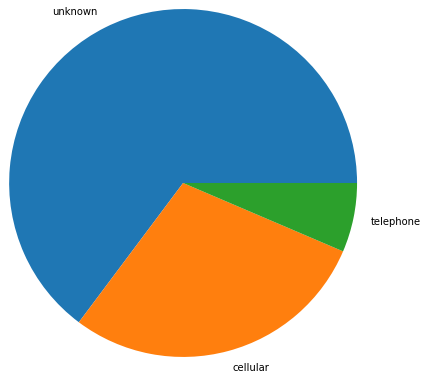

In [ ]:
values_contact = df.contact.value_counts()
labels_contact = df.contact.unique().tolist()
plt.pie(values_contact, labels=labels_contact, radius = 2)

print(values_contact)

yes    25130
no     20081
Name: housing, dtype: int64


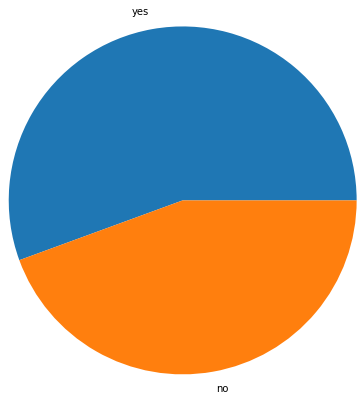

In [ ]:
values_housing = df.housing.value_counts()
labels_housing = df.housing.unique().tolist()
plt.pie(values_housing, labels=labels_housing, radius = 2)

print(values_housing)

no     37967
yes     7244
Name: loan, dtype: int64


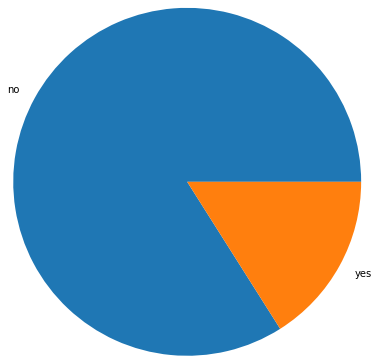

In [ ]:
values_loan = df.loan.value_counts()
labels_loan = df.loan.unique().tolist()
plt.pie(values_loan, labels=labels_loan, radius = 2)

print(values_loan)

no     39922
yes     5289
Name: y, dtype: int64


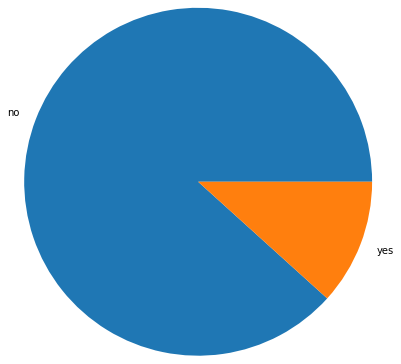

In [ ]:
values_y = df.y.value_counts()
labels_y = df.y.unique().tolist()
plt.pie(values_y, labels=labels_y, radius = 2)

print(values_y)

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


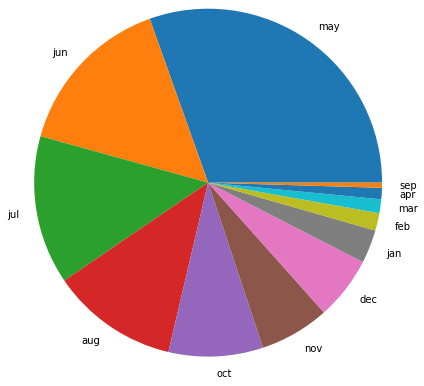

In [ ]:
values_month = df.month.value_counts()
labels_month = df.month.unique().tolist()
plt.pie(values_month, labels=labels_month, radius = 2)

print(values_month)

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


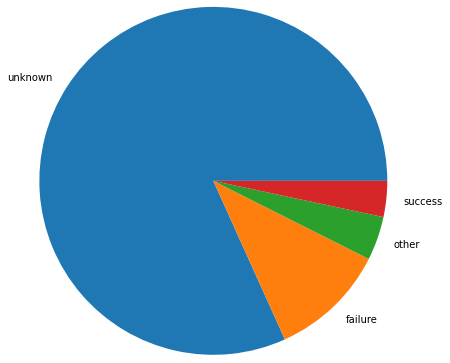

In [ ]:
values_poutcome = df.poutcome.value_counts()
labels_poutcome = df.poutcome.unique().tolist()
plt.pie(values_poutcome, labels=labels_poutcome, radius = 2)

print(values_poutcome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


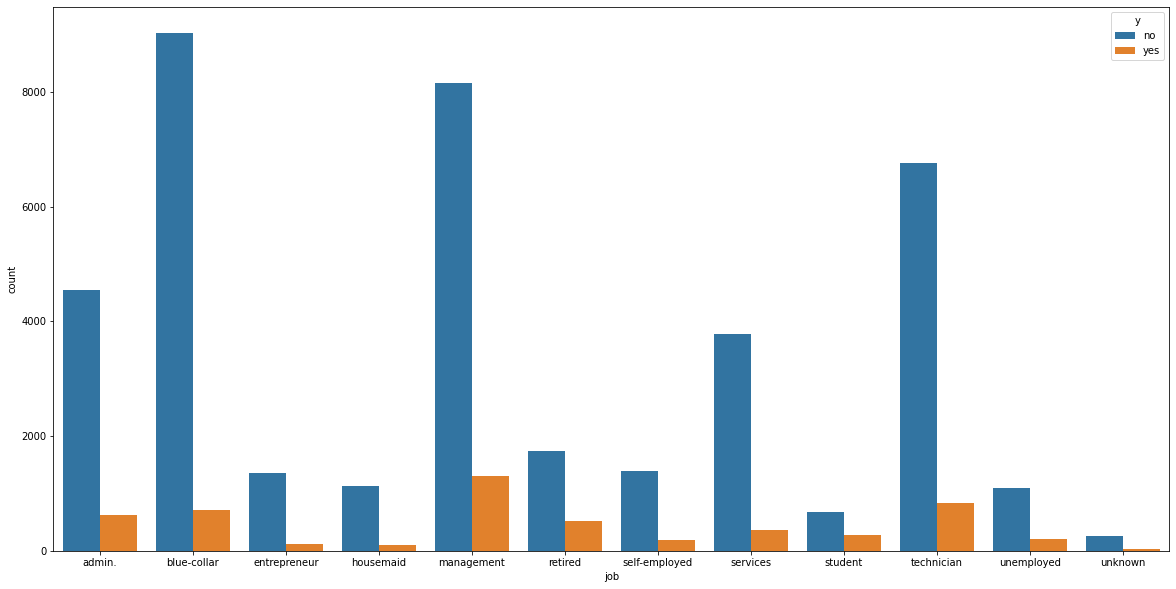

In [ ]:
#Bivariate Analysis
# first we will do for categorical columns with y
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df.job, hue=df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


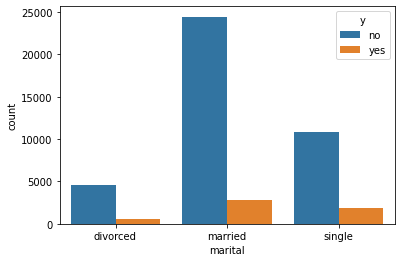

In [ ]:
sns.countplot(df.marital, hue= df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


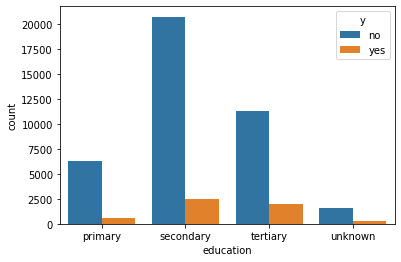

In [ ]:
sns.countplot(df.education, hue = df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


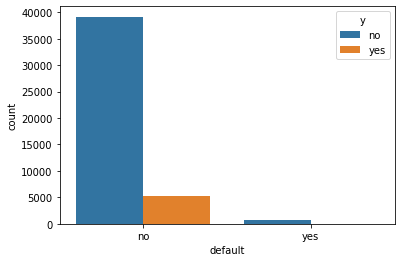

In [ ]:
sns.countplot(df.default, hue = df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


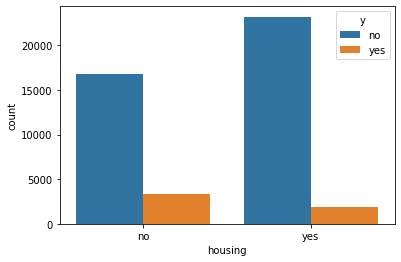

In [ ]:
sns.countplot(df.housing, hue=df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


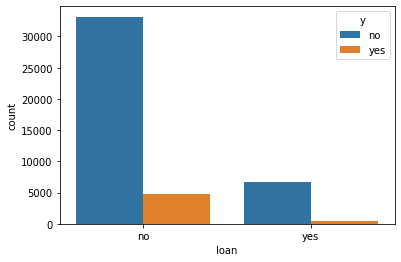

In [ ]:
sns.countplot(df.loan, hue=df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


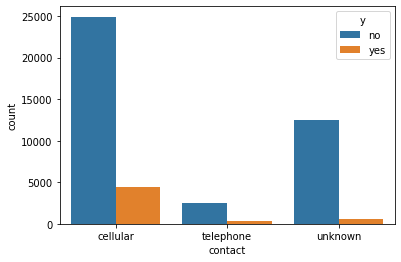

In [ ]:
sns.countplot(df.contact, hue=df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


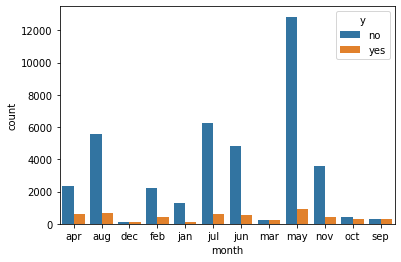

In [ ]:
sns.countplot(df.month, hue=df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


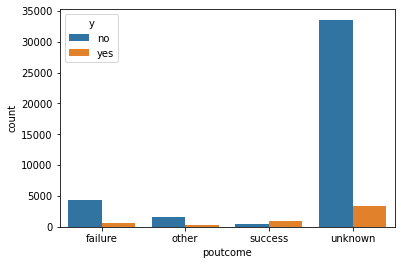

In [ ]:
sns.countplot(df.poutcome, hue = df.y)

- overall trend is that the y outcome is by larger ratio no. No matter what the other column's value stand.

- We can also say that poutcome column has significant amount of data of unknown values.

In [10]:
# y Col to be transformed
df = pd.get_dummies(data=df, columns=['y'], drop_first= True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1, blue - y_yes = 0


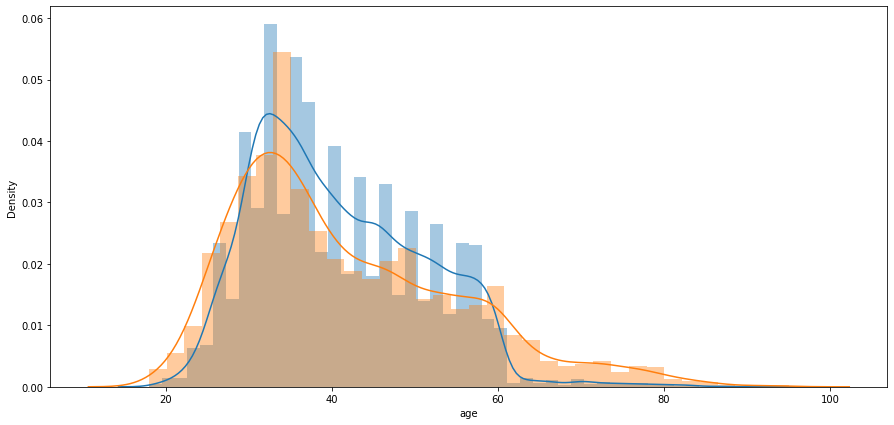

In [ ]:
#now we will perform Bivariate analysis on numerical columns with y
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['age'])
sns.distplot(df[df['y_yes']==1]['age'])

print("amber - y_yes = 1, blue - y_yes = 0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1 
 blue - y_yes = 0


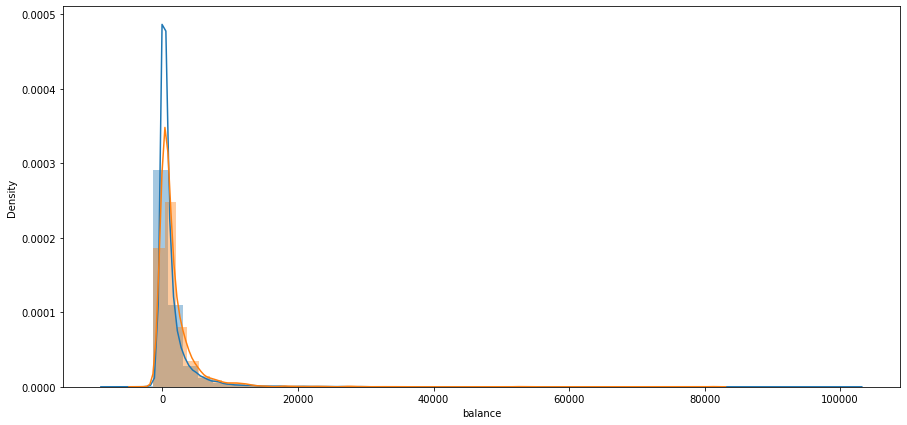

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['balance'])
sns.distplot(df[df['y_yes']==1]['balance'])

print("amber - y_yes = 1",'\n', "blue - y_yes = 0")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


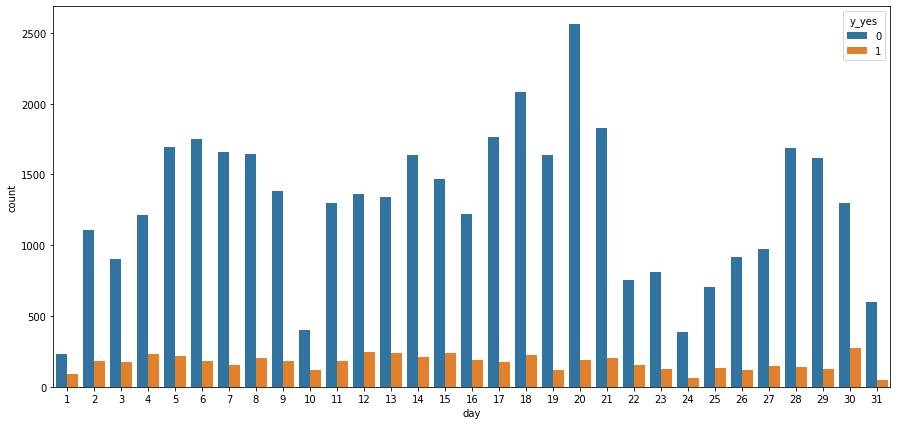

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df.day, hue = df.y_yes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1 
 blue - y_yes = 0


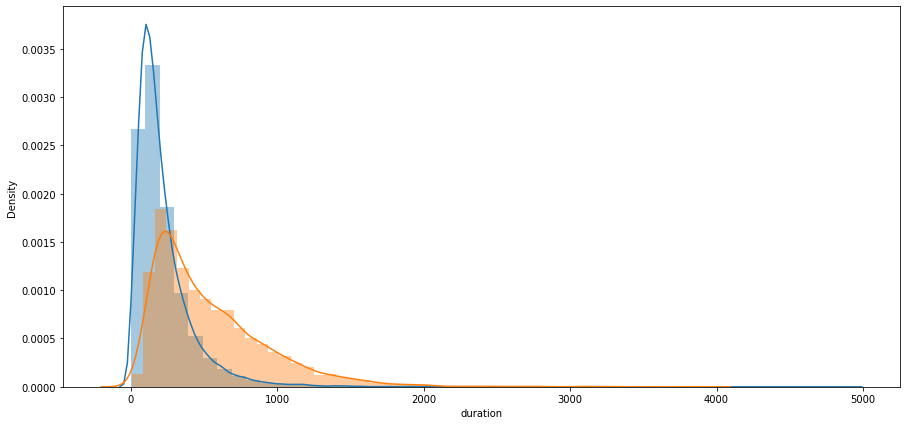

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['duration'])
sns.distplot(df[df['y_yes']==1]['duration'])

print("amber - y_yes = 1",'\n', "blue - y_yes = 0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1 
 blue - y_yes = 0


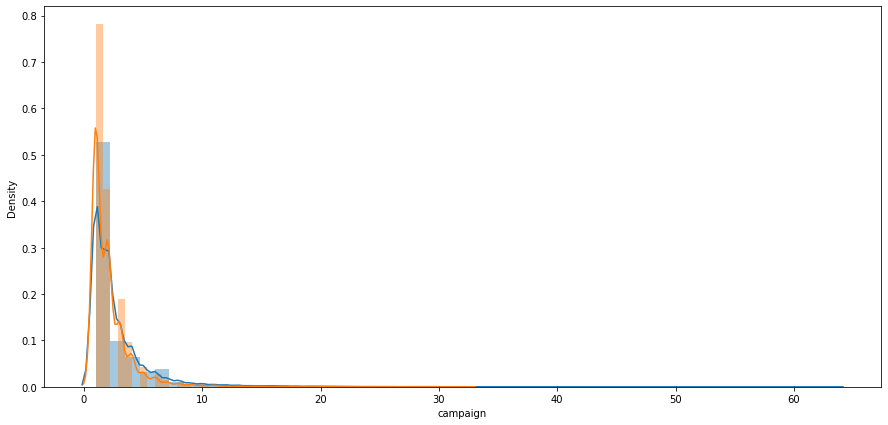

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['campaign'])
sns.distplot(df[df['y_yes']==1]['campaign'])

print("amber - y_yes = 1",'\n', "blue - y_yes = 0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1 
 blue - y_yes = 0


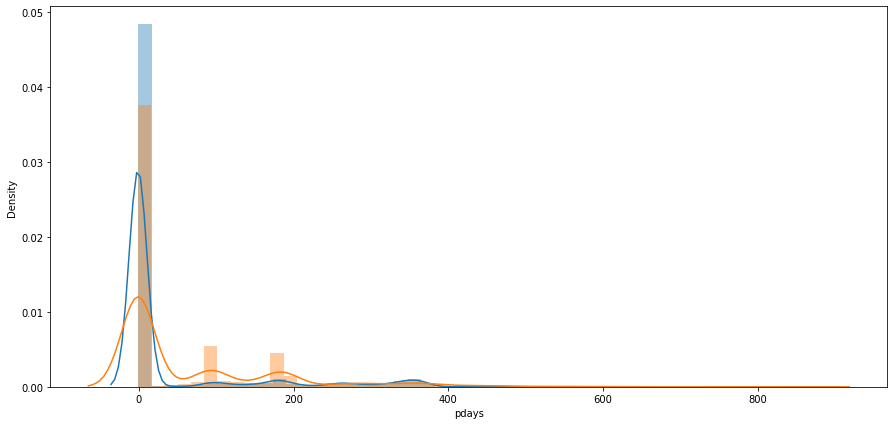

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['pdays'])
sns.distplot(df[df['y_yes']==1]['pdays'])

print("amber - y_yes = 1",'\n', "blue - y_yes = 0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


amber - y_yes = 1 
 blue - y_yes = 0


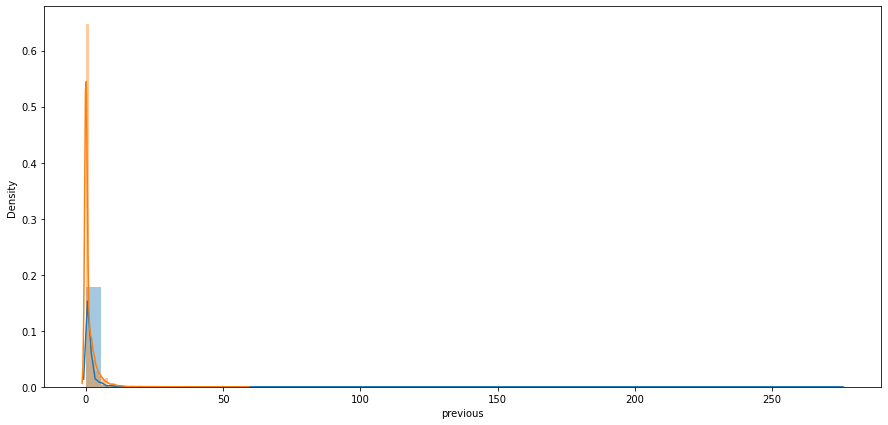

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['y_yes']==0]['previous'])
sns.distplot(df[df['y_yes']==1]['previous'])

print("amber - y_yes = 1",'\n', "blue - y_yes = 0")

- By these plots we can observe more the number of contacts are made with cx also more duration of contact is made, we get positive outcome.

- we can also observe if the contact person large amount of time, there is no garuntee for positive outcome.

{'boxes': [<matplotlib.lines.Line2D at 0x7f481b287510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f481b225a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f481b299050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f481b299e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f481b2876d0>,
  <matplotlib.lines.Line2D at 0x7f481b225610>]}

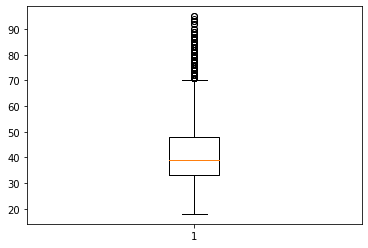

In [ ]:
#checking for outliers
plt.boxplot(df.age)

{'boxes': [<matplotlib.lines.Line2D at 0x7f481b19bdd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f481b1a2dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f481b12ae10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f481b12a8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f481b1a2350>,
  <matplotlib.lines.Line2D at 0x7f481b1a2890>]}

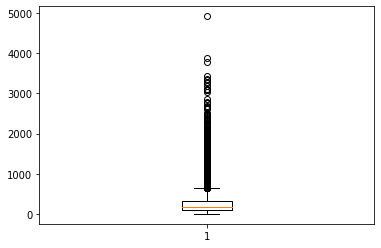

In [ ]:
plt.boxplot(df.duration)

{'boxes': [<matplotlib.lines.Line2D at 0x7f481b10b050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f481b112090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f481b11b0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f481b112b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f481b10b5d0>,
  <matplotlib.lines.Line2D at 0x7f481b10bb10>]}

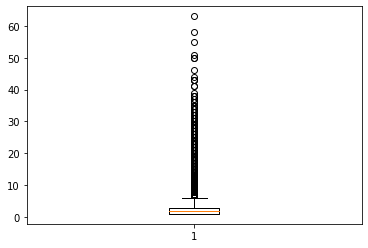

In [ ]:
plt.boxplot(df.campaign)

- By this plot, we can conclude it is very unusual that one person has been contacted under this campaign for more than 60 times.

- There are a large amount of outliers in our dataset.

{'boxes': [<matplotlib.lines.Line2D at 0x7f5c2bac4d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5c2b3f4050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c2b441810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c2b3dba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5c2b3fc450>,
  <matplotlib.lines.Line2D at 0x7f5c2b3fcbd0>]}

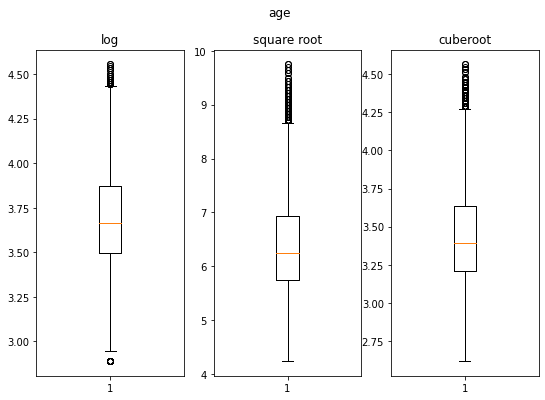

In [ ]:
#Lets try diff transformation on age column
import numpy as np
plt.subplots(figsize = (9,6))
plt.suptitle('age')
plt.subplot(131)
plt.title('log')
plt.boxplot(np.log(df['age']))
plt.subplot(132)
plt.title('square root')
plt.boxplot(np.sqrt(df['age']))
plt.subplot(133)
plt.title('cuberoot')
plt.boxplot(np.cbrt(df['age']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'boxes': [<matplotlib.lines.Line2D at 0x7f5c2b2fb7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5c2b301810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c2b308850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c2b308310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5c2b2fbd50>,
  <matplotlib.lines.Line2D at 0x7f5c2b3012d0>]}

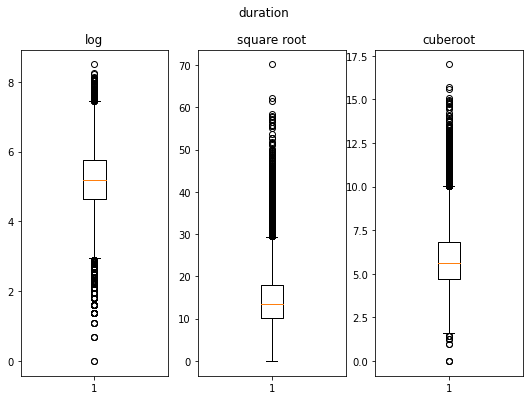

In [ ]:
#Lets try diff transformation on age column
import numpy as np
plt.subplots(figsize = (9,6))
plt.suptitle('duration')
plt.subplot(131)
plt.title('log')
plt.boxplot(np.log(df['duration']))
plt.subplot(132)
plt.title('square root')
plt.boxplot(np.sqrt(df['duration']))
plt.subplot(133)
plt.title('cuberoot')
plt.boxplot(np.cbrt(df['duration']))

{'boxes': [<matplotlib.lines.Line2D at 0x7f5c2b483610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5c2b48a650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c2b411690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c2b411150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5c2b483b90>,
  <matplotlib.lines.Line2D at 0x7f5c2b48a110>]}

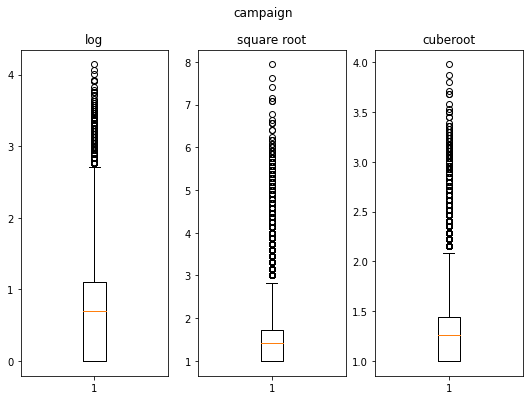

In [ ]:
#Lets try diff transformation on age column
import numpy as np
plt.subplots(figsize = (9,6))
plt.suptitle('campaign')
plt.subplot(131)
plt.title('log')
plt.boxplot(np.log(df['campaign']))
plt.subplot(132)
plt.title('square root')
plt.boxplot(np.sqrt(df['campaign']))
plt.subplot(133)
plt.title('cuberoot')
plt.boxplot(np.cbrt(df['campaign']))

Also we cannot get rid ofthe outliers as the number of outliers is very high and it can effect the outcome very much

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y_yes,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


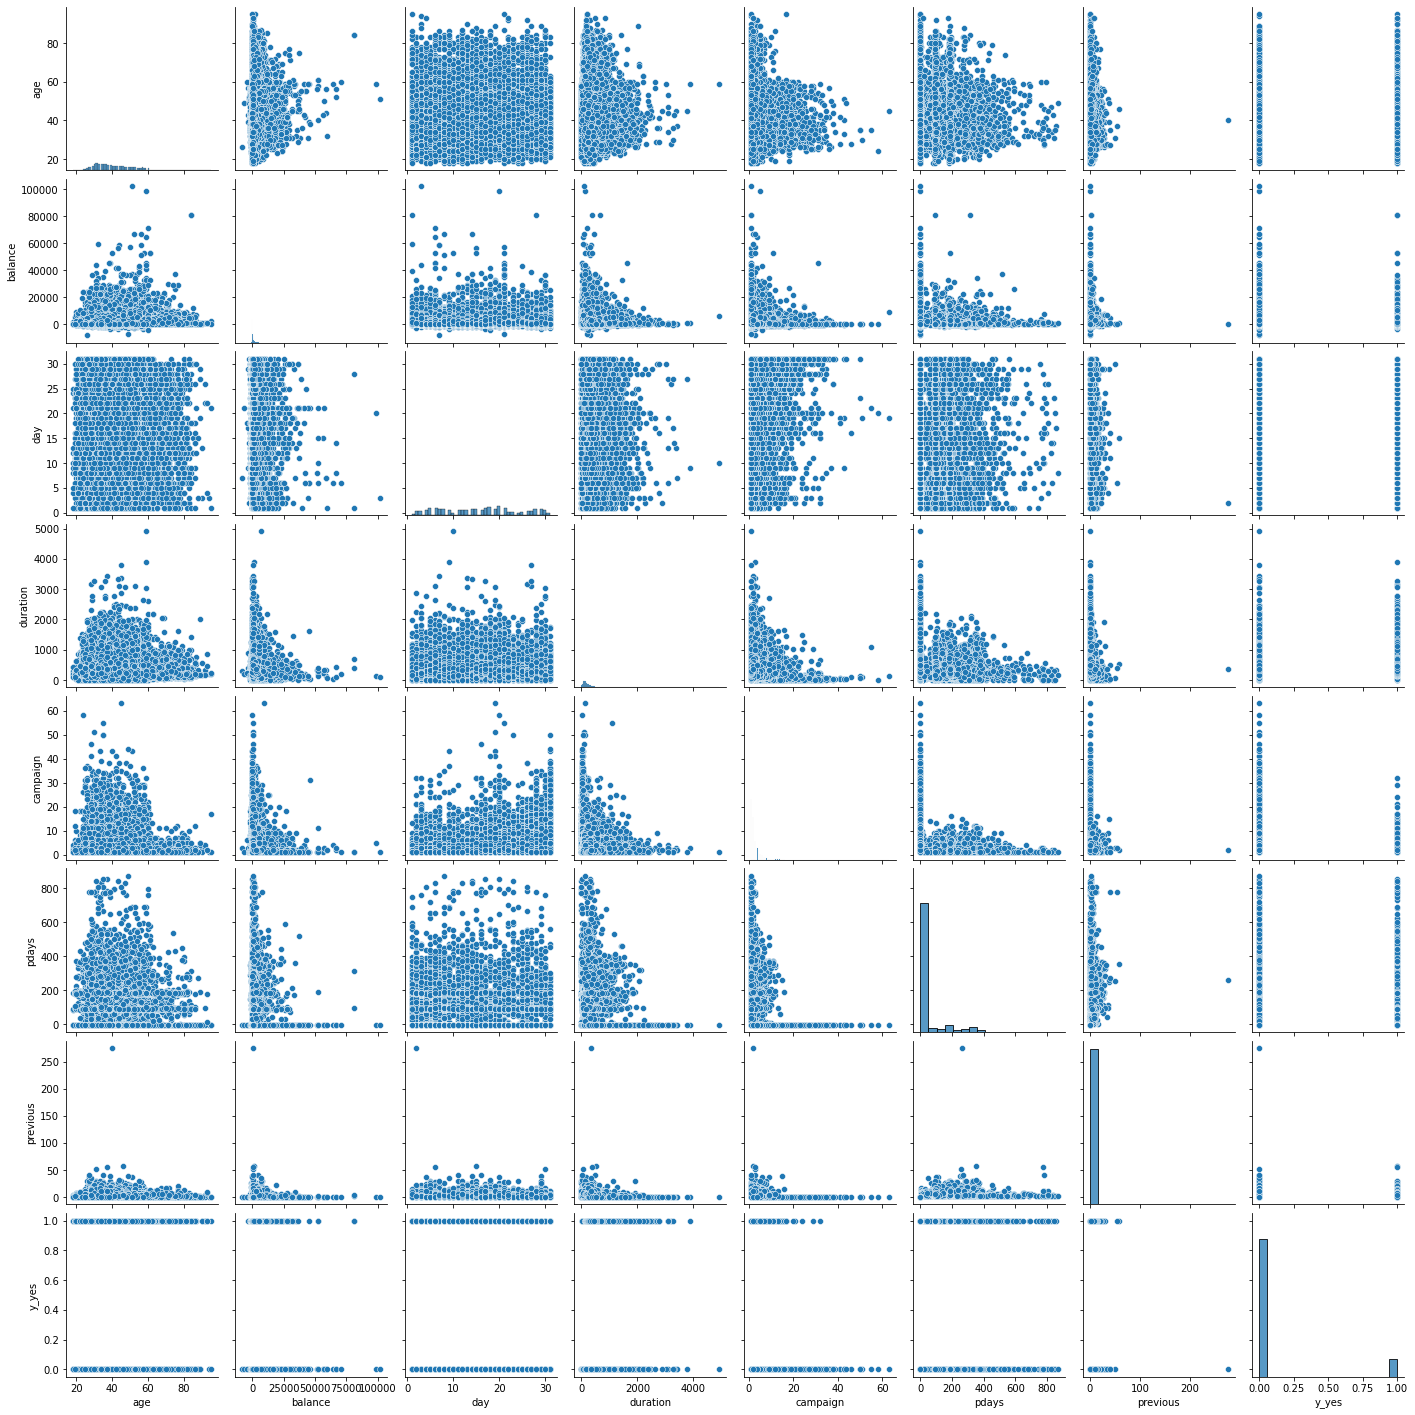

In [ ]:
sns.pairplot(df)

In [ ]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [4]:
#to convert categorical columns data into dummy variables
df = pd.get_dummies(data=df, columns=['job'], drop_first= True)
df = pd.get_dummies(data=df, columns=['marital'], drop_first= True)
df = pd.get_dummies(data=df, columns=['education'], drop_first= True)
df = pd.get_dummies(data=df, columns=['default'], drop_first= True)
df = pd.get_dummies(data=df, columns=['housing'], drop_first= True)
df = pd.get_dummies(data=df, columns=['loan'], drop_first= True)
df = pd.get_dummies(data=df, columns=['contact'], drop_first= True)
df = pd.get_dummies(data=df, columns=['month'], drop_first= True)
df = pd.get_dummies(data=df, columns=['poutcome'], drop_first= True)

In [11]:
# To see all columns
pd.set_option("display.max.columns", None)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [12]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [13]:
df.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar     

In [15]:
df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [ ]:
df.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar     

In [ ]:
# Label Encoding Technique

In [16]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

**Applying Standard Scaler**

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [18]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,balance,age,duration,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0.256419,1.606965,0.011016,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,5,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,5,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


**To Fit a Model**

In [20]:
# Dividing our data into input and output variables 
X = df_standard_scaled.iloc[:,1:42]
Y = df_standard_scaled.iloc[:,-1]

In [21]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [24]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[38961   961]
 [ 3488  1801]]


In [26]:
acc = (38961+961)/(38961+961+3488+1801)
print(acc)

0.8830151954170445


In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.34      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

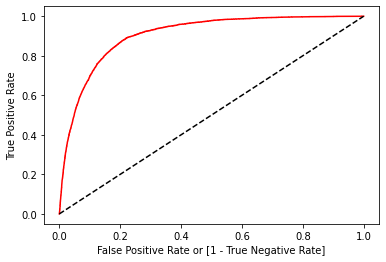

In [28]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [29]:
auc

0.6582230580299006